In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [104]:
## Q1
#1. Regression is used to predict numeric values for new data based on existing data. Classification, however, is used to predict CATEGORICAL values
# for new data from existing data. 

#2. A confusion table is useful for conceptualizing error. It crosstabulates the predicted and true values in a Confusion matrix, looking for patterns 
# in sucesses and failures. 

#3. SSE is the sum squared error. It is the predicted value subtracted from the true value, and then squared, and summed over all the observations. It
# can be used to assess whether the model is a good fit.

#4. Overfitting is when a model is too complex to reliably explain the phenomenon. Underfitting is occurs when a model is too simple to be reliable in 
# how explaines the phenomenon that the researcher is interested in. 

#5. Splitting the data allows you to have one set for training, and the other as the target. This can be used to determine if the model is reliable. 
# For example, you could split the data 80/20, training on the 80% and testing it on the 20% target data. 
# Choosing k by evaluating accuracy or SSE helps find the most reliable model. A small k can overfit while a large k can underfit. Determining the best
# value for k can be done by seeing which value of k produces the smallest SSE. 

#6. The k Nearest Neighbor Classification Algorithm is computing either using the modal case among neighbors, or a probability of each class occuring, 
# proportional to the frequence in the neighbors. The benefit of the first is you get a clear answer from a set. It takes the most common from among a 
# set. However, this is a simple majority and might not be the best option in all cases. For the second method, a probability for each class is 
# calculated, providing you with far more information than the first method. However, it is more complex. 

In [105]:
## Question 2.1 keep price, year, mileage

cars_df = pd.read_csv("data/USA_cars_datasets.csv")
subset = cars_df[["price", "year","mileage"]]

print(subset["price"].isna().sum())
print(subset["year"].isna().sum())
print(subset["mileage"].isna().sum())

print(subset.head(5))
print(subset.shape)
print(subset.columns)

# There are no Nas to handle. There are 3 variables and 2499 observations in this dataset. 

0
0
0
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
Index(['price', 'year', 'mileage'], dtype='object')


In [106]:
## Question 2.2 
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = subset.loc[:,['year','mileage']]
X = X.apply(maxmin)
print(X.head(5))

#subset.loc[:,'year']=X['year']
#subset.loc[:,'mileage']=X['mileage']
#print(subset.head(5))

       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537


In [107]:
## Question 2.3:

y=subset['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

In [108]:
from sklearn.neighbors import KNeighborsRegressor

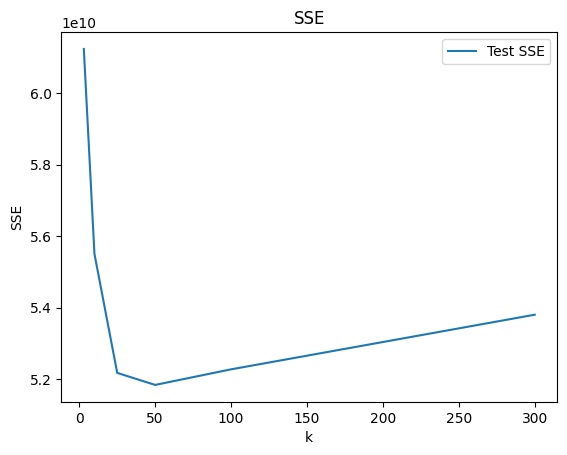

In [109]:
## Question 2.4: use kNN algorithm and the training data to predict price using year and mileage for the test set for k=3,10,25,50,100,300. For each 
#value of K, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you 
# notice as you increase K?

k_bar = [3,10,25,50,100,300]
SSE = [] 
SSE_on_train = []

for k in k_bar:
    model = KNeighborsRegressor(n_neighbors=k+1) 
    fitted_model = model.fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test) 
    SSE.append(np.sum( (y_test-y_hat)**2 )) 
    y_hat = fitted_model.predict(X_train)
    SSE_on_train.append(np.sum((y_train-y_hat)**2))

plt.plot(k_bar,SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

In [110]:
print(type(SSE))
print(SSE)
print(SSE[1])
print(len(SSE))

<class 'list'>
[np.float64(61233238204.75), np.float64(55500475971.64463), np.float64(52171677172.2929), np.float64(51835449704.51211), np.float64(52271575594.649536), np.float64(53799312465.44944)]
55500475971.64463
6


In [111]:
# Mean squared error
n=len(y_test)
SSE3 = SSE[1]/n
SSE10 = SSE[2]/n
SSE25 = SSE[3]/n
SSE50 = SSE[1]/n
SSE100= SSE[1]/n
SSE300 = SSE[1]/n

print(SSE3)
print(SSE10)
print(SSE25)
print(SSE50)
print(SSE100)
print(SSE300)

111000951.94328927
104343354.3445858
103670899.40902421
111000951.94328927
111000951.94328927
111000951.94328927


In [112]:
# As k incrreases, SSE beings to increase, which is not ideal. SSE initially decreases until k=50, but increases after that.

In [113]:
## Question 2.5: Optimal K

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

# the optimal k is 4

[4]


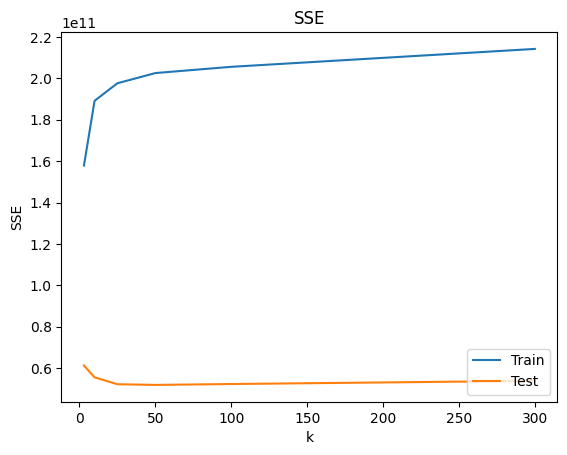

In [114]:
# 2.6: Describe what happened in the plots of predicted versus actual prices as 
 # varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

plt.plot(k_bar,SSE_on_train,label='Train') # Plot SSE by k
plt.plot(k_bar,SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

# In this example, the training SSE is much higher than the testing SSE. this indicates underfitting, especially as k increases. The lower ranges of k 
# seem to fit the data better. This makes sense with the previous calculations that put the optimal k at 4.